# Business Understanding

Objectives:
1.	Understand Household Electricity Consumption Patterns: The primary objective of this project is to gain insights into the household's electricity consumption patterns over time. This includes analyzing the trends, seasonality, and any other relevant patterns in the various electricity-related variables.
2.	Identify Factors Influencing Electricity Consumption: The project aims to identify the key factors that influence the household's electricity consumption, such as time of day, day of the week, seasons, and the usage of specific appliances (sub-metering data).
3.	Develop Predictive Models: Using the time series data, the project may involve developing predictive models to forecast future electricity consumption patterns. This could help the household better manage its energy usage and costs.
4.	Optimize Energy Efficiency: The insights gained from the analysis can be used to identify opportunities for improving energy efficiency within the household, such as identifying high-consumption appliances or periods of the day/week with peak demand.
Potential Business Applications:
1.	Household Energy Management: The analysis can help the household better understand its energy consumption patterns and make informed decisions to optimize energy usage and reduce costs.
2.	Utility Company Insights: The project's findings could provide valuable insights to utility companies about residential electricity consumption patterns, which could aid in grid management, demand forecasting, and the development of targeted energy efficiency programs.
3.	Energy Policy and Planning: The project's insights could contribute to the development of energy policies and planning initiatives that aim to promote energy efficiency and sustainability at the household and community levels.
4.	Research and Development: The dataset and analysis could be used for further research and development in the areas of smart home technologies, energy management systems, and the optimization of household energy consumption.
Overall, this time series project on household electricity consumption has the potential to provide valuable insights that can benefit the household, utility companies, policymakers, and researchers in the energy and sustainability domains.

# Data Understanding and Loading

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
#Importing libraries
import sys
import numpy as np # linear algebra
from scipy.stats import randint
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt # this is used for the plot the graph
import seaborn as sns # used for plot interactive graph.
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn.preprocessing import StandardScaler # for normalization
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline # pipeline making
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics # for the check the error and accuracy of the model
from sklearn.metrics import mean_squared_error,r2_score

In [9]:
#Data Loading
df = pd.read_csv('/content/household_power_consumption[1].txt', sep=';',
                 parse_dates={'dt' : ['Date', 'Time']}, infer_datetime_format=True,
                 low_memory=False, na_values=['nan','?'], index_col='dt')

<ipython-input-9-2f40051c7c9e>:2: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv('/content/household_power_consumption[1].txt', sep=';',
<ipython-input-9-2f40051c7c9e>:2: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df = pd.read_csv('/content/household_power_consumption[1].txt', sep=';',


In [10]:
# Ensure 'Datetime' column is present and convert to datetime
if 'Datetime' in df.columns:
    df['Datetime'] = pd.to_datetime(df['Datetime'])
    dfset_index('Datetime', inplace=True)

In [9]:
df.head()

Global_active_power  Global_reactive_power  Voltage  \
dt                                                                         
2006-12-16 17:24:00                4.216                  0.418   234.84   
2006-12-16 17:25:00                5.360                  0.436   233.63   
2006-12-16 17:26:00                5.374                  0.498   233.29   
2006-12-16 17:27:00                5.388                  0.502   233.74   
2006-12-16 17:28:00                3.666                  0.528   235.68   

                     Global_intensity  Sub_metering_1  Sub_metering_2  \
dt                                                                      
2006-12-16 17:24:00              18.4             0.0             1.0   
2006-12-16 17:25:00              23.0             0.0             1.0   
2006-12-16 17:26:00              23.0             0.0             2.0   
2006-12-16 17:27:00              23.0             0.0             1.0   
2006-12-16 17:28:00              15.8             0.0             1.0   

                     Sub_metering_3  
dt                                   
2006-12-16 17:24:00            17.0  
2006-12-16 17:25:00            16.0  
2006-12-16 17:26:00            17.0  
2006-12-16 17:27:00            17.0  
2006-12-16 17:28:00            17.0

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 126.7 MB


In [11]:
df.shape

(2075259, 7)

In [12]:
df.describe().T

count        mean       std      min      25%  \
Global_active_power    2049280.0    1.091615  1.057294    0.076    0.308   
Global_reactive_power  2049280.0    0.123714  0.112722    0.000    0.048   
Voltage                2049280.0  240.839858  3.239987  223.200  238.990   
Global_intensity       2049280.0    4.627759  4.444396    0.200    1.400   
Sub_metering_1         2049280.0    1.121923  6.153031    0.000    0.000   
Sub_metering_2         2049280.0    1.298520  5.822026    0.000    0.000   
Sub_metering_3         2049280.0    6.458447  8.437154    0.000    0.000   

                           50%      75%      max  
Global_active_power      0.602    1.528   11.122  
Global_reactive_power    0.100    0.194    1.390  
Voltage                241.010  242.890  254.150  
Global_intensity         2.600    6.400   48.400  
Sub_metering_1           0.000    0.000   88.000  
Sub_metering_2           0.000    1.000   80.000  
Sub_metering_3           1.000   17.000   31.000

# Data Cleaning

In [13]:
#Checking for missing values
df.isnull().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [14]:
#Checking for duplicates
df.duplicated().sum()

168560

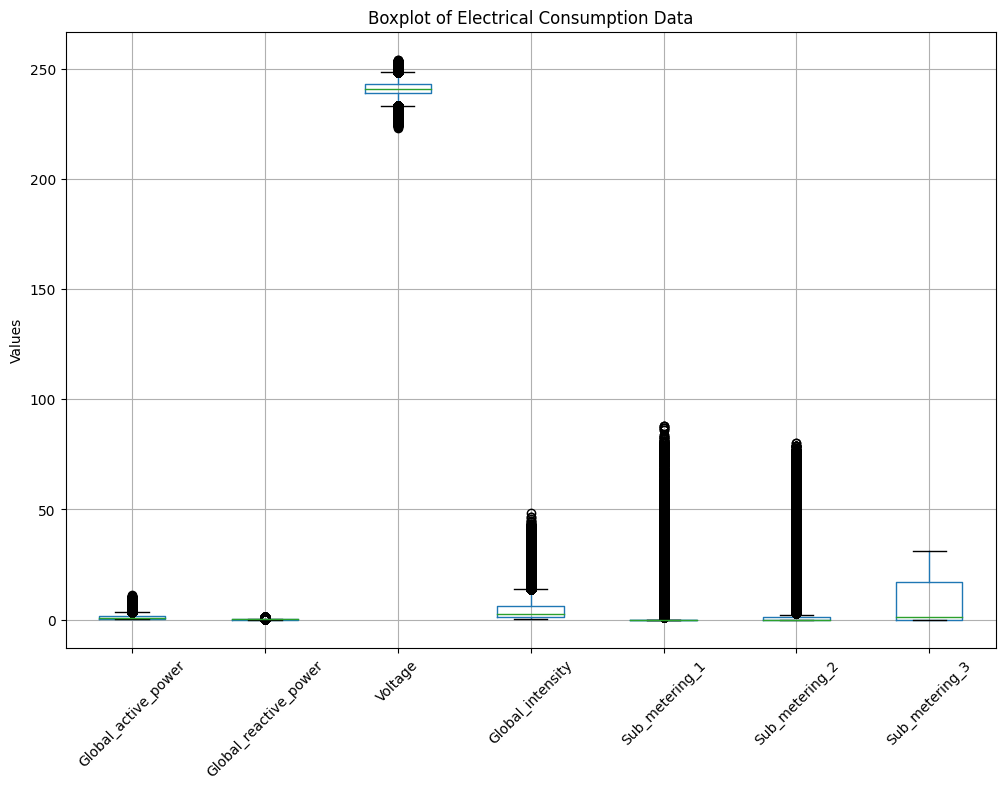

In [15]:
#Checking for outliers
plt.figure(figsize=(12, 8))
df.boxplot(column=['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3'])
plt.title('Boxplot of Electrical Consumption Data')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

We have no outliers

# Data Visualiation and EDA

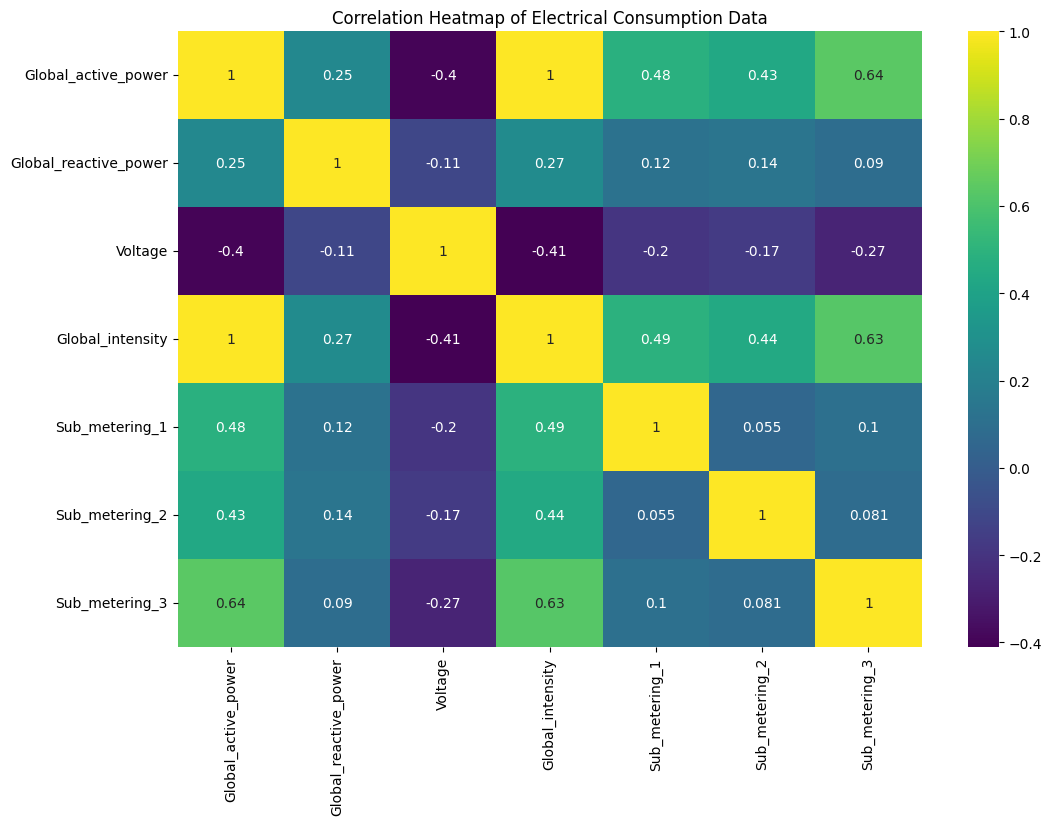

In [16]:
#Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='viridis')
plt.title('Correlation Heatmap of Electrical Consumption Data')
plt.show()

In [17]:
#Highly correlated features summary
corr_matrix = df.corr()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(abs(upper[column]) > 0.5)]

print(f"The following {len(to_drop)} features are highly correlated (|r| > 0.5):")
print(', '.join(to_drop))

The following 2 features are highly correlated (|r| > 0.5):
Global_intensity, Sub_metering_3


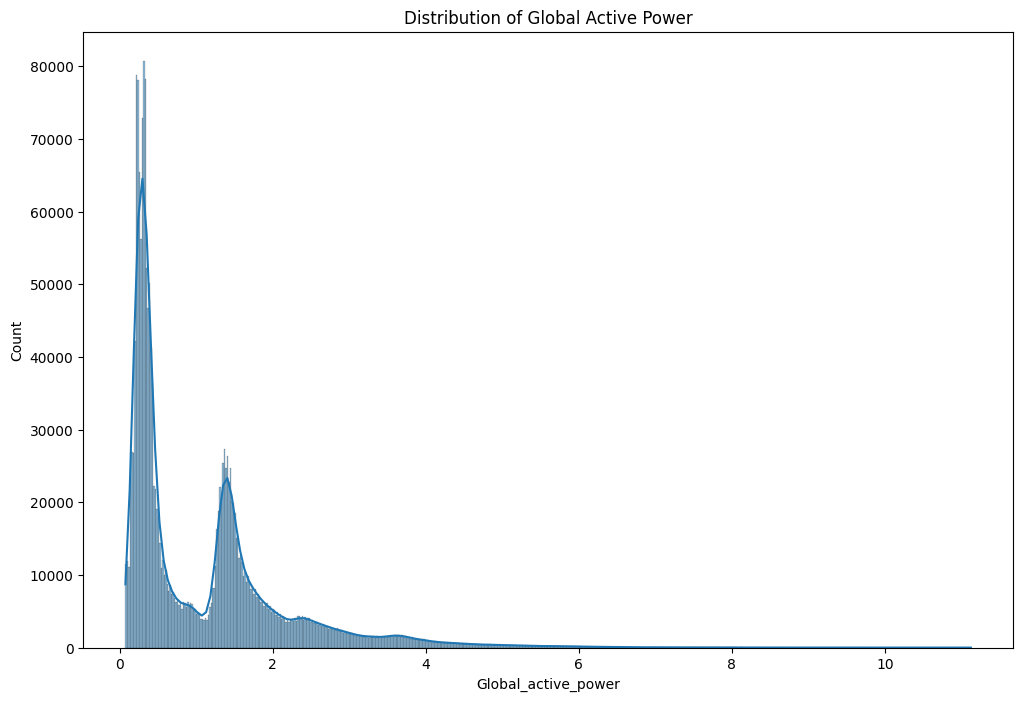

In [18]:
#Univariate analysis on Global active power
plt.figure(figsize=(12, 8))
sns.histplot(data=df, x='Global_active_power', kde=True)
plt.title('Distribution of Global Active Power')
plt.show()

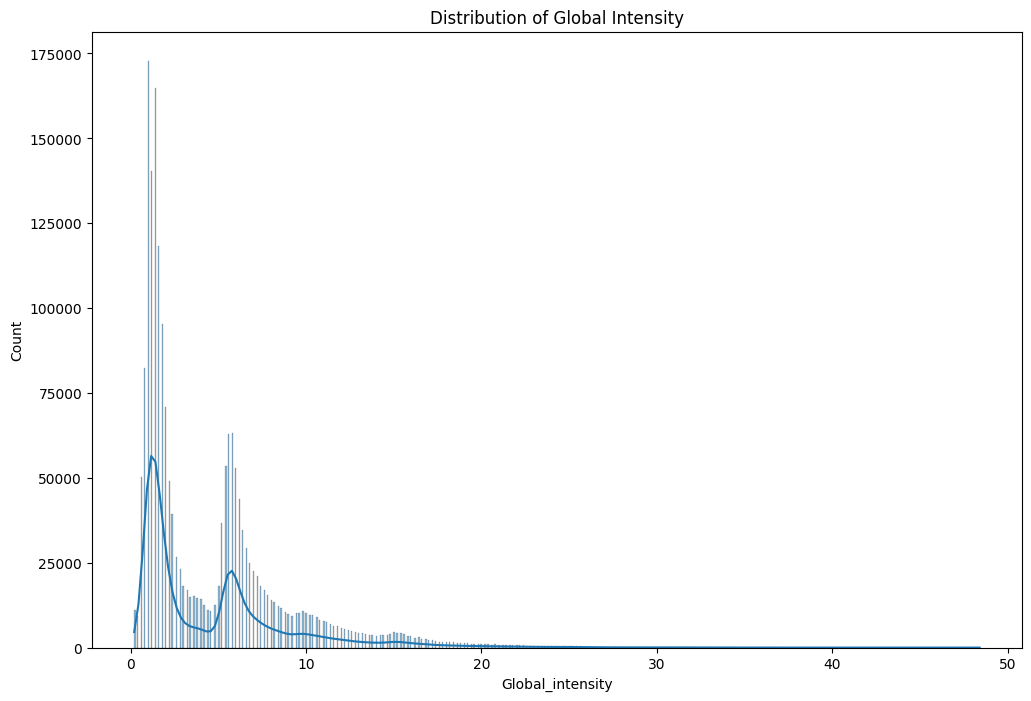

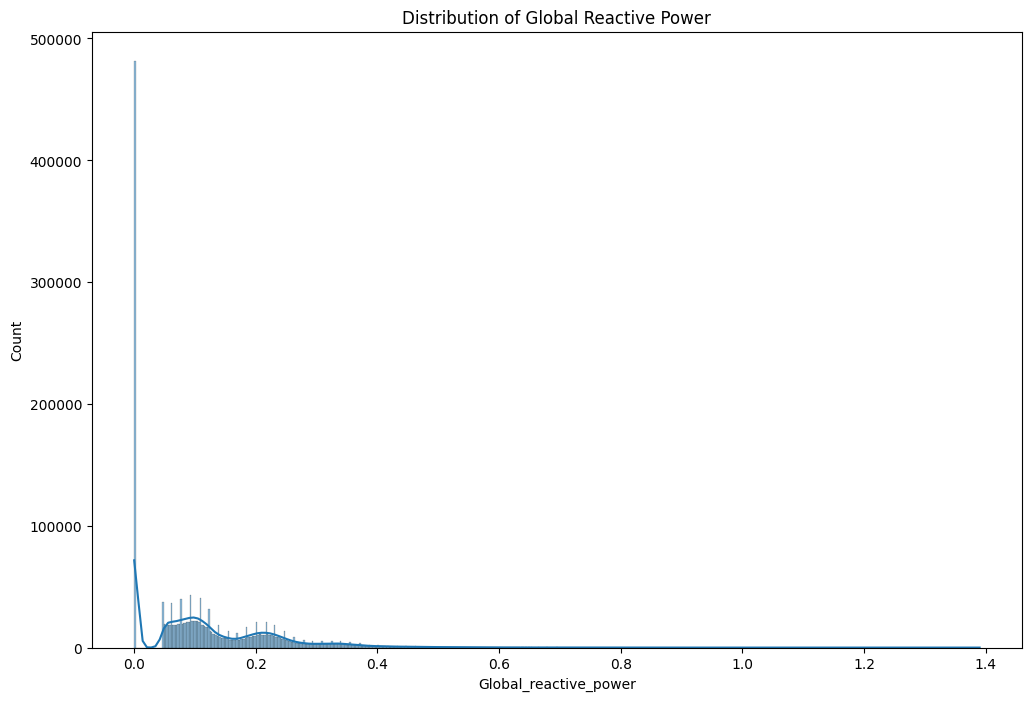

In [19]:
##Univariate analysis on Global reactive power and Global intensity
plt.figure(figsize=(12, 8))
sns.histplot(data=df, x='Global_intensity', kde=True)
plt.title('Distribution of Global Intensity')
plt.show()
plt.figure(figsize=(12, 8))
sns.histplot(data=df, x='Global_reactive_power', kde=True)
plt.title('Distribution of Global Reactive Power')
plt.show()

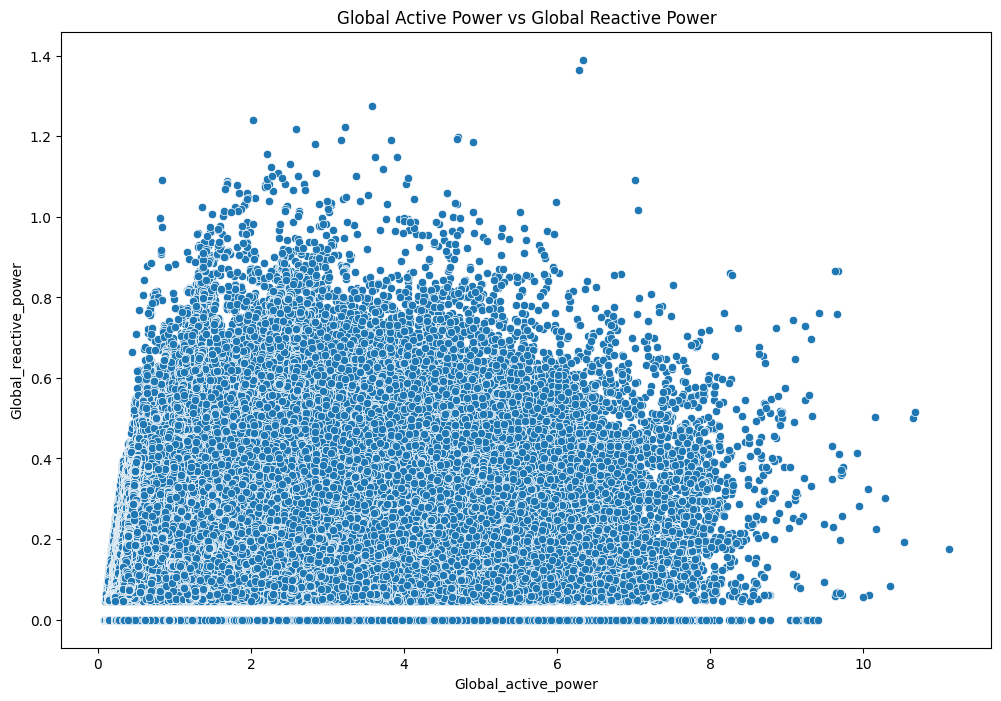

In [20]:
#plotting global active power vs global reactive power
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Global_active_power', y='Global_reactive_power')
plt.title('Global Active Power vs Global Reactive Power')
plt.show()

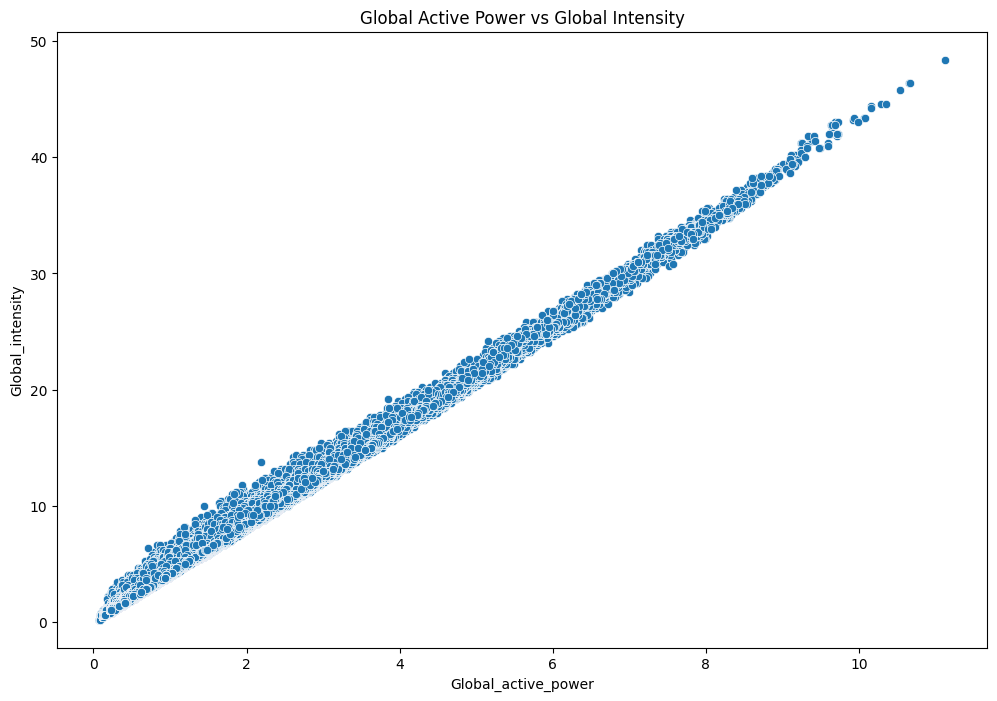

In [21]:
#plotting global active power vs global intensity
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Global_active_power', y='Global_intensity')
plt.title('Global Active Power vs Global Intensity')
plt.show()

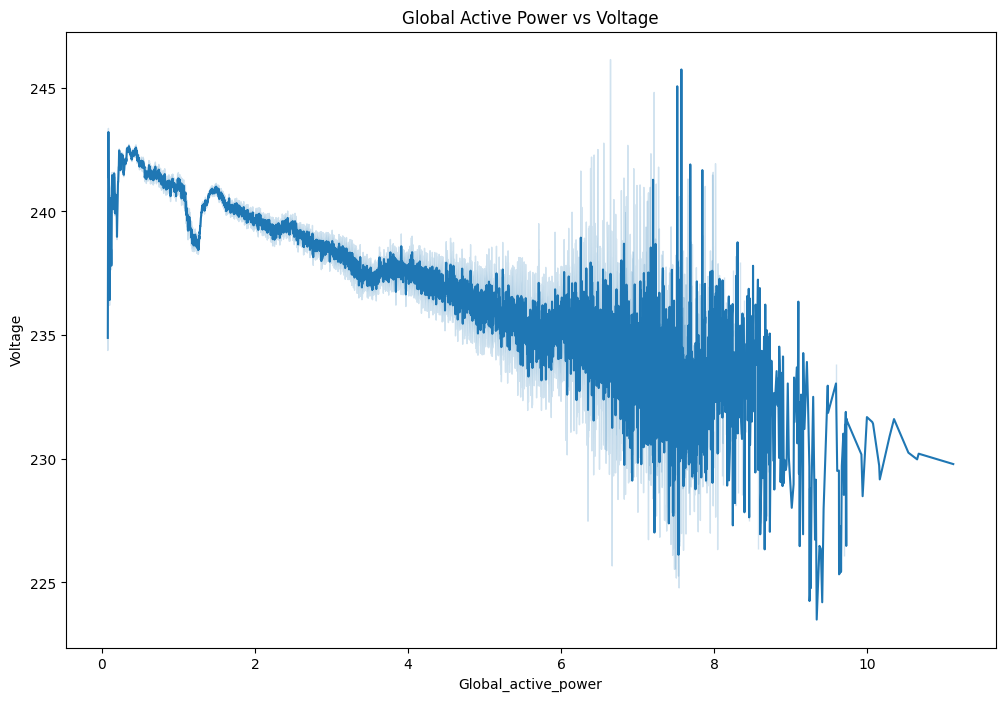

In [22]:
#plotting global active power and voltage line plot
plt.figure(figsize=(12, 8))
sns.lineplot(data=df, x='Global_active_power', y='Voltage')
plt.title('Global Active Power vs Voltage')
plt.show()


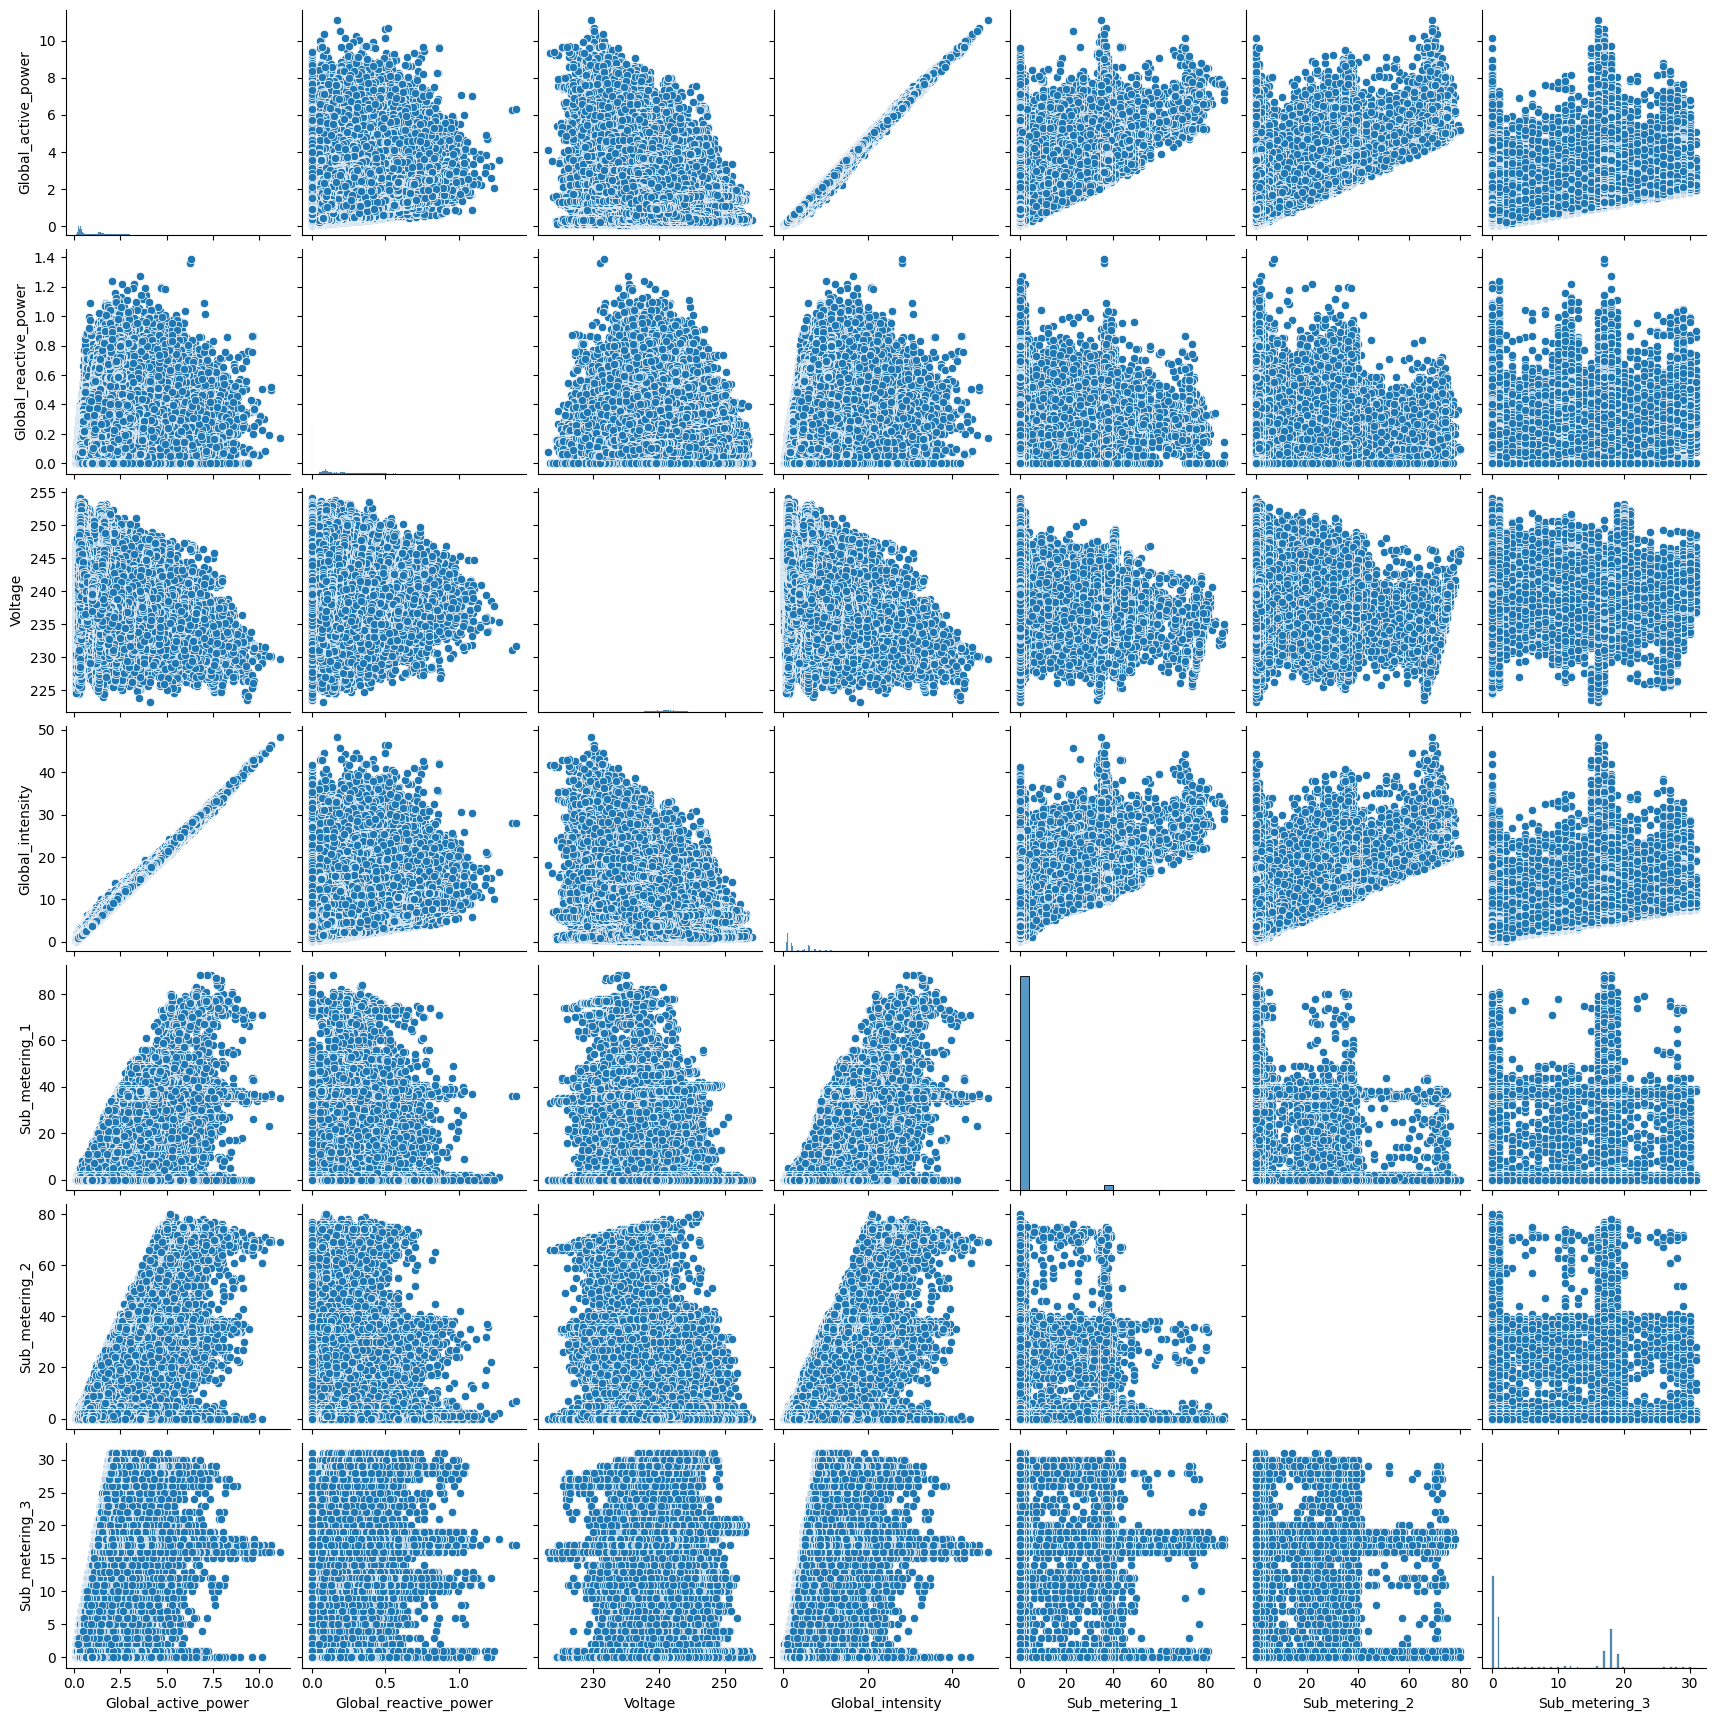

In [23]:
#multivariate analysis for all features
sns.pairplot(df)
plt.show()

In [24]:
#Checking the distribution of out data
df.skew()

Global_active_power      1.786233
Global_reactive_power    1.261914
Voltage                 -0.326665
Global_intensity         1.849100
Sub_metering_1           5.944541
Sub_metering_2           7.090553
Sub_metering_3           0.724688
dtype: float64

<ipython-input-25-a771818689ed>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Global_active_power'])


<Axes: xlabel='Global_active_power', ylabel='Density'>

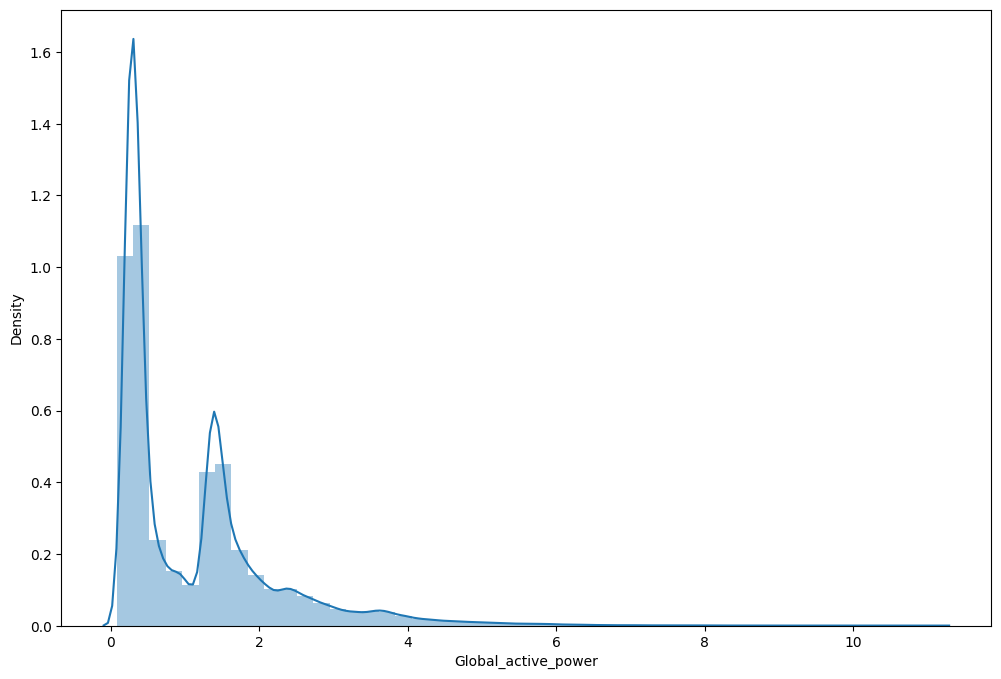

In [25]:
#Checking if our data is normally distributed
plt.figure(figsize=(12, 8))
sns.distplot(df['Global_active_power'])

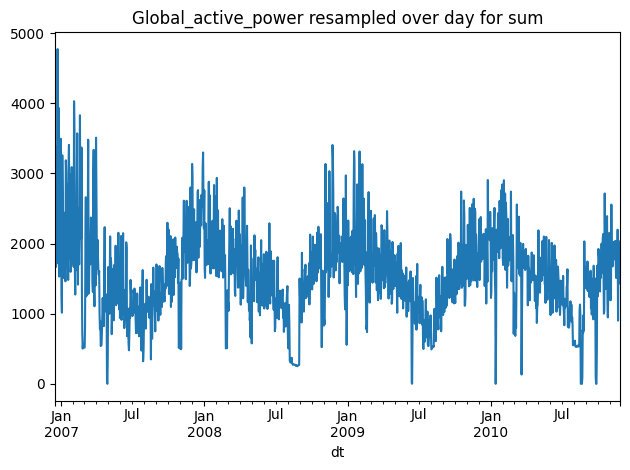

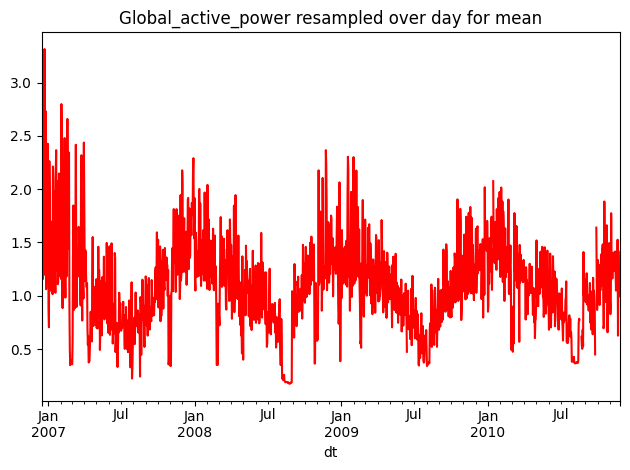

In [26]:
#Resampling the data over Day
df.Global_active_power.resample('D').sum().plot(title='Global_active_power resampled over day for sum')
#df.Global_active_power.resample('D').mean().plot(title='Global_active_power resampled over day', color='red')
plt.tight_layout()
plt.show()

df.Global_active_power.resample('D').mean().plot(title='Global_active_power resampled over day for mean', color='red')
plt.tight_layout()
plt.show()

The sum plot helps identify total daily consumption patterns.
The mean plot helps identify average daily usage, smoothing out multiple entries per day
Sum Plot:High consumption on February 23rd and lower on 27th .
Mean plot :Highest mean on February 23rd, showing a day with consistently high usage.

Below I show mean and std of 'Global_intensity' resampled over day

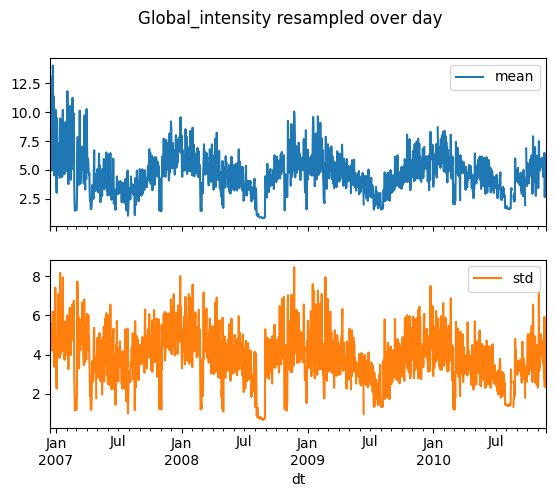

In [27]:
r = df.Global_intensity.resample('D').agg(['mean', 'std'])
r.plot(subplots = True, title='Global_intensity resampled over day')
plt.show()

showing mean and std of 'Global_reactive_power' resampled over day

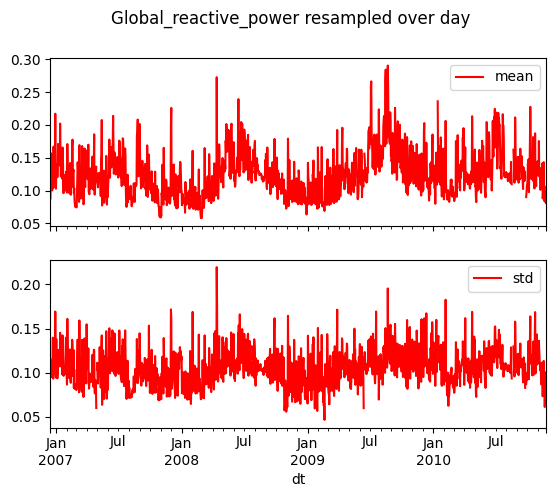

In [28]:
r2 = df.Global_reactive_power.resample('D').agg(['mean', 'std'])
r2.plot(subplots = True, title='Global_reactive_power resampled over day', color='red')
plt.show()

Sum of 'Global_active_power' resampled over month

Columns in DataFrame: Index(['Global_active_power', 'Datetime'], dtype='object')
Monthly Sum of Global_active_power:
Datetime
2023-01-31    3.6
2023-02-28    7.3
2023-03-31    2.3
Freq: M, Name: Global_active_power, dtype: float64


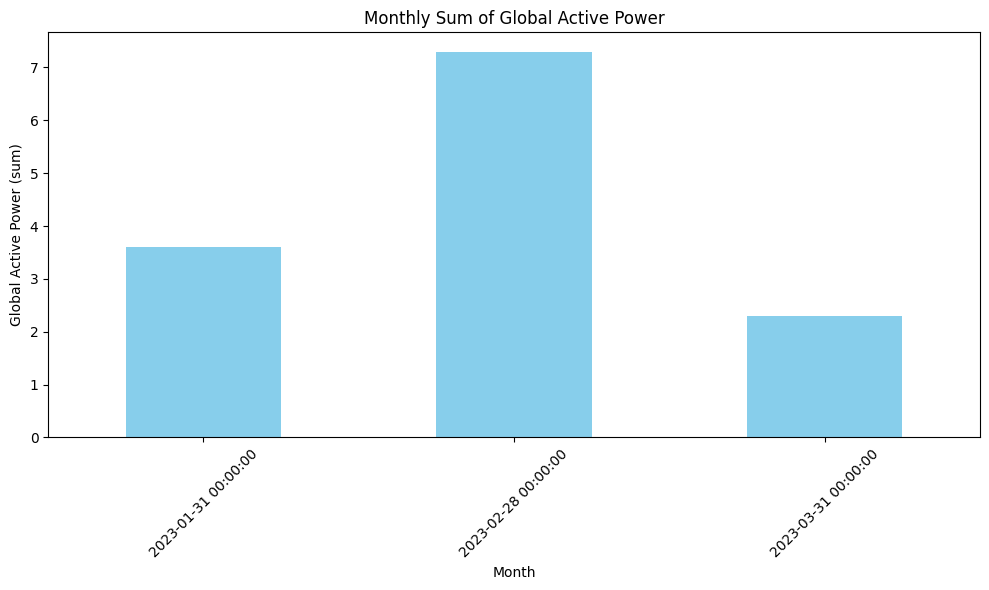

In [29]:
# Sample data creation
data = pd.DataFrame({
    'Global_active_power': [1.2, 2.4, 3.1, 4.2, 2.3],
    'Datetime': ['2023-01-01', '2023-01-02', '2023-02-01', '2023-02-02', '2023-03-01']
})

# Print the columns to verify
print("Columns in DataFrame:", data.columns)

# Ensure 'Datetime' column is present and convert to datetime
if 'Datetime' in data.columns:
    data['Datetime'] = pd.to_datetime(data['Datetime'])
    data.set_index('Datetime', inplace=True)

    # Resample the data by month and calculate the sum of 'Global_active_power'
    monthly_sum = data['Global_active_power'].resample('M').sum()

    # Display the result
    print("Monthly Sum of Global_active_power:")
    print(monthly_sum)
     # Plot the result
    plt.figure(figsize=(10, 6))
    monthly_sum.plot(kind='bar', color='skyblue')
    plt.title('Monthly Sum of Global Active Power')
    plt.xlabel('Month')
    plt.ylabel('Global Active Power (sum)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("The column 'Datetime' does not exist in the DataFrame.")

February 2023 has the highest energy consumption (sum of 'Global_active_power'), possibly indicating higher activity or usage during that month.
March 2023 has the lowest energy consumption, which could suggest less activity or fewer data points.
January 2023 falls in between, showing moderate energy consumption.

In [30]:
#Scaling of Data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)





In [5]:
#perform ADF test
from statsmodels.tsa.stattools import adfuller
import pandas as pd # Import pandas to create a DataFrame

# Recreate the DataFrame if needed
data = pd.DataFrame({
    'Global_active_power': [1.2, 2.4, 3.1, 4.2, 2.3],
    'Datetime': ['2023-01-01', '2023-01-02', '2023-02-01', '2023-02-02', '2023-03-01']
})

df = data
result = adfuller(df['Global_active_power'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))



ADF Statistic: -1.911313
p-value: 0.326758
Critical Values:
	1%: -7.355
	5%: -4.474
	10%: -3.127


Given that the ADF statistic (-25.145043) is much lower than the critical values at all significance levels (1%, 5%, 10%), and the p-value is 0.000000, you can reject the null hypothesis with high confidence.

**MOVING AVERAGE**

In [11]:
if 'Datetime' in df.columns:
    df['Datetime'] = pd.to_datetime(df['Datetime'])
    df.set_index('Datetime', inplace=True)
ma = df.resample('D').mean()
ma.head()



Global_active_power  Global_reactive_power     Voltage  \
dt                                                                   
2006-12-16             3.053475               0.088187  236.243763   
2006-12-17             2.354486               0.156949  240.087028   
2006-12-18             1.530435               0.112356  241.231694   
2006-12-19             1.157079               0.104821  241.999313   
2006-12-20             1.545658               0.111804  242.308062   

            Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
dt                                                                            
2006-12-16         13.082828        0.000000        1.378788       12.439394  
2006-12-17          9.999028        1.411806        2.907639        9.264583  
2006-12-18          6.421667        0.738194        1.820139        9.734722  
2006-12-19          4.926389        0.582639        5.279167        4.303472  
2006-12-20          6.467361        0.000000        1.838889        9.765972

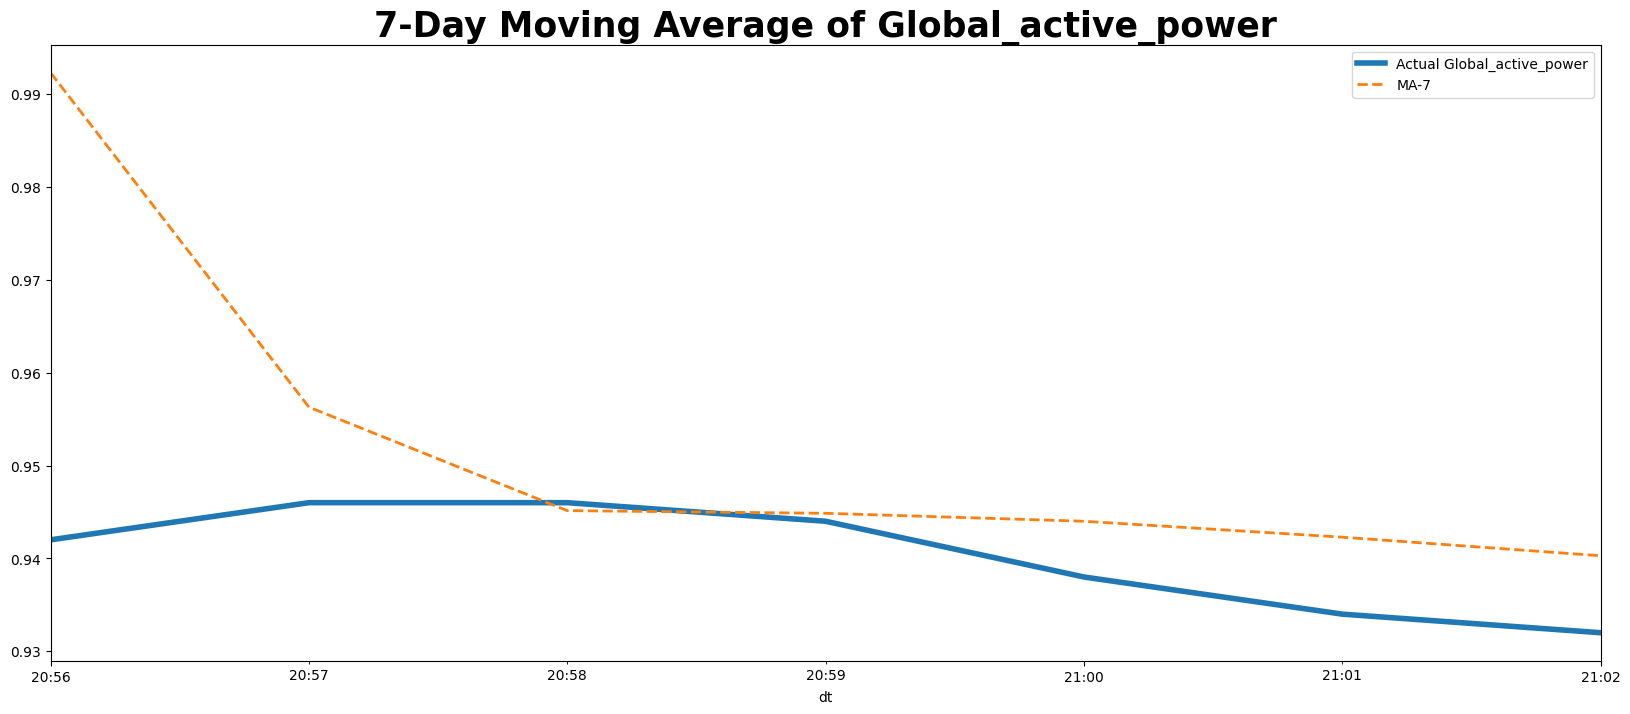

In [14]:
import matplotlib.pyplot as plt

def moving_average(df, column_name, window):
    df['Moving Average'] = df[column_name].rolling(window).mean()
    actual = df[column_name][-window:]
    ma = df['Moving Average'][-window:]

    plt.figure(figsize=(20, 8))
    actual.plot(label='Actual {}'.format(column_name), lw=4)
    ma.plot(label='MA-{}'.format(str(window)), ls='--', lw=2)
    plt.title('{}-Day Moving Average of {}'.format(str(window), column_name), weight='bold', fontsize=25)
    plt.legend()

# Example usage:
# Assuming df is your DataFrame with 'Global_active_power' column
moving_average(df, column_name='Global_active_power', window=7)
plt.show()  # Show the plot



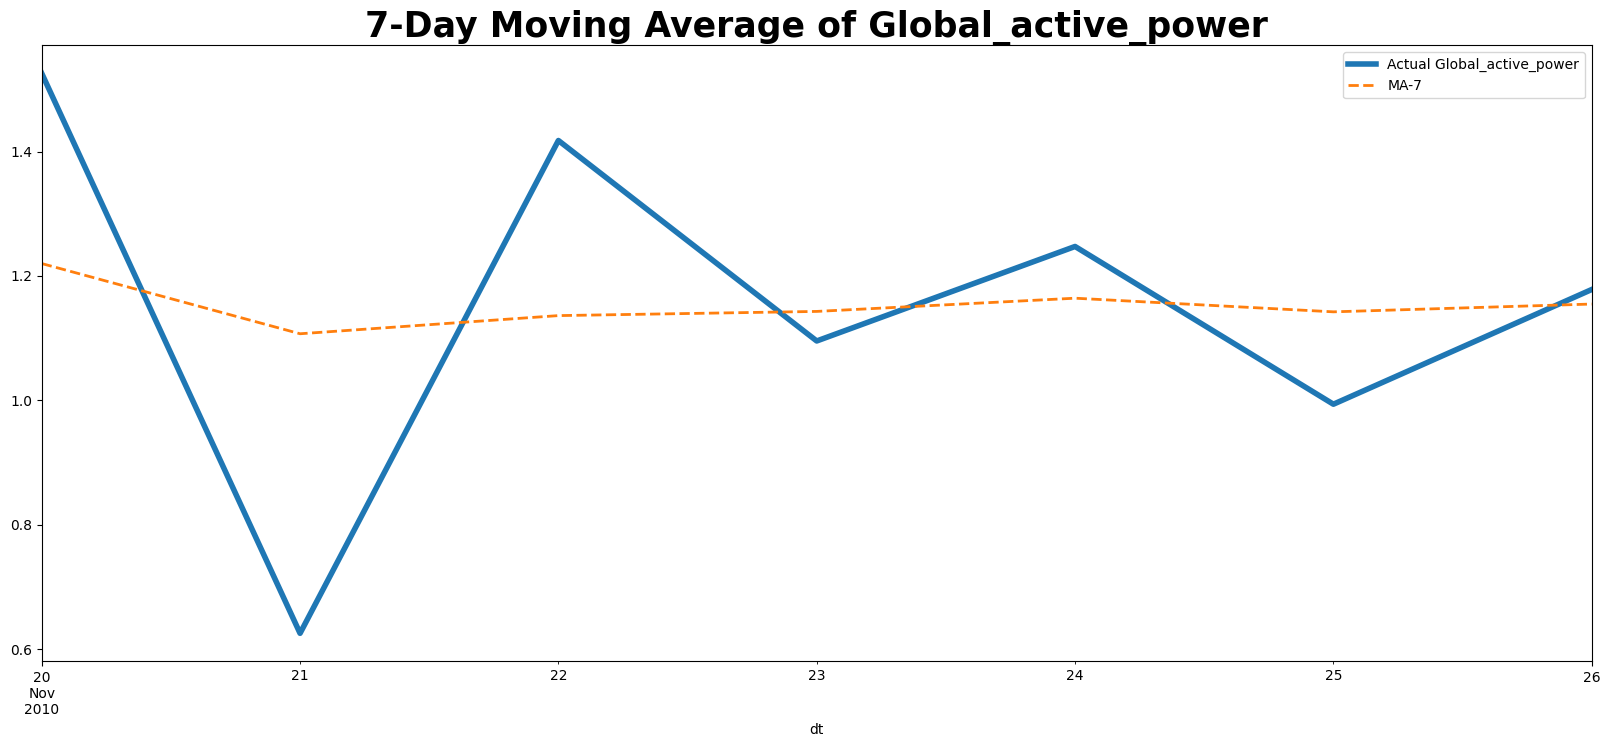

In [18]:
import matplotlib.pyplot as plt

def moving_average(data, window):
    # Calculate moving average and add it as a column to the DataFrame
    data['Moving Average'] = data['Global_active_power'].rolling(window).mean()

    actual = data['Global_active_power'][-window:]
    ma = data['Moving Average'][-window:]

    plt.figure(figsize=(20, 8))
    actual.plot(label='Actual Global_active_power', lw=4)
    ma.plot(label='MA-{}'.format(str(window)), ls='--', lw=2)
    plt.title('{}-Day Moving Average of Global_active_power'.format(str(window)), weight='bold', fontsize=25)
    plt.legend()

# Example usage assuming 'ma' DataFrame has 'Global_active_power' column
moving_average(ma, window=7)  # Now 'ma' DataFrame will have a 'Moving Average' column
plt.show()  # Show the plot


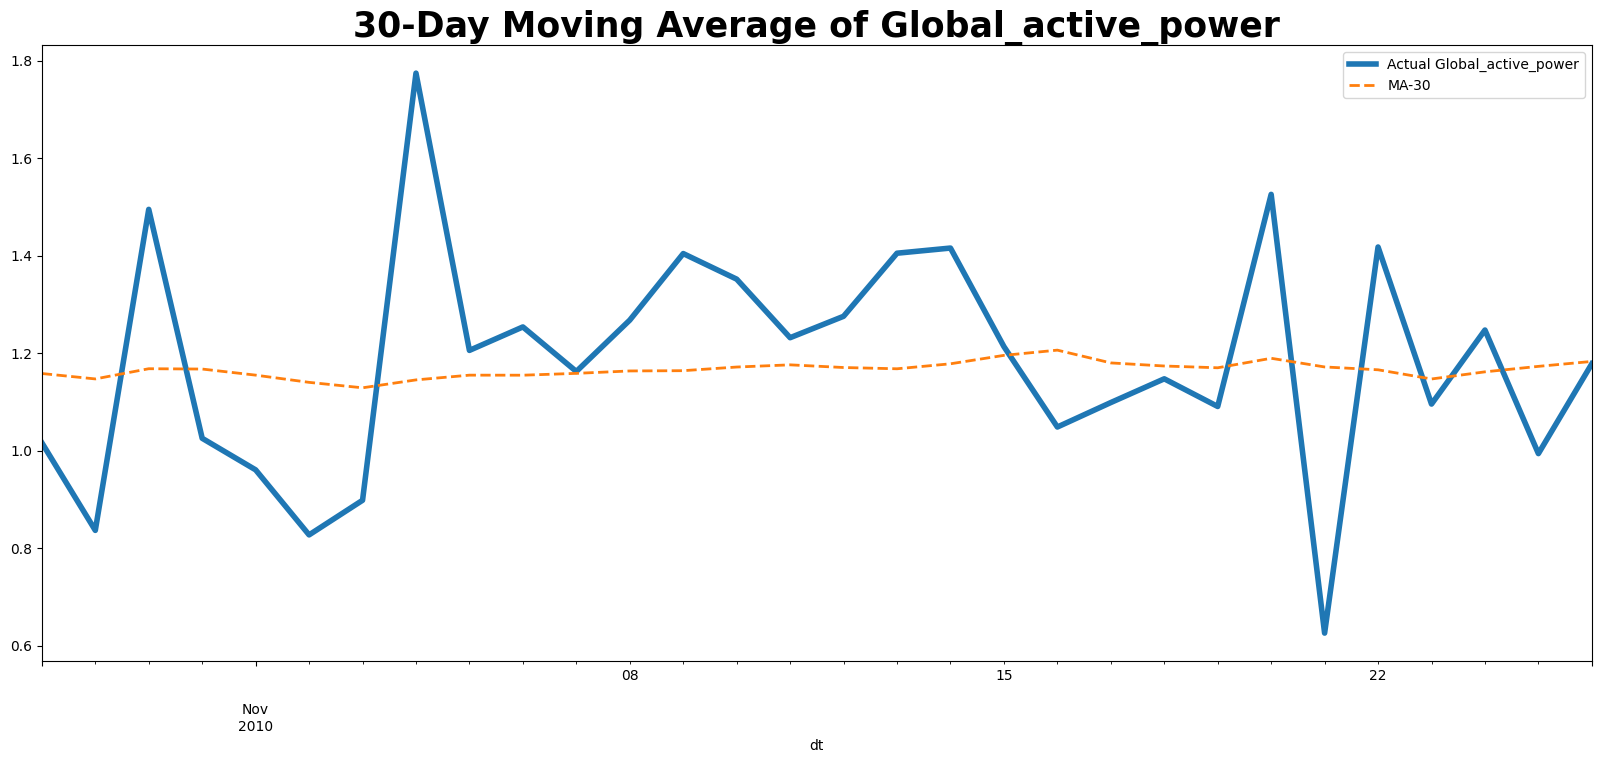

In [19]:
moving_average(ma, window=30)
plt.show()  # Show the plot


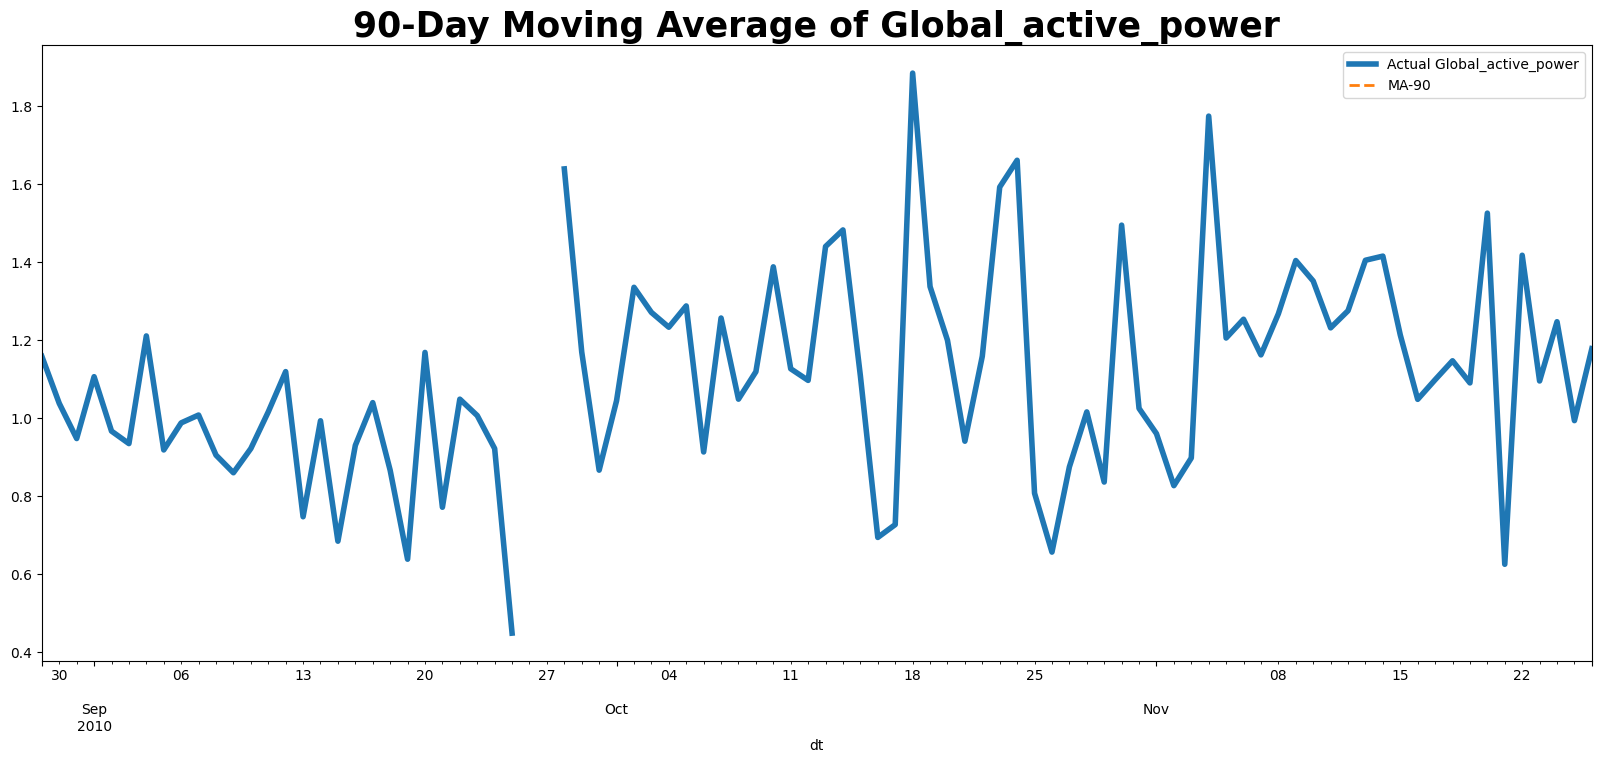

In [22]:

moving_average(ma, window=90)
plt.show()  # Show the plot

In [26]:
from sklearn.model_selection import train_test_split

#Spliting and training the dataset
X = df.drop('Global_active_power', axis=1)
y = df['Global_active_power']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create new DataFrames df_train and df_test from the split data
df_train = pd.concat([X_train, y_train], axis=1)
df_test = pd.concat([X_test, y_test], axis=1)
print('Train:\t', len(df_train))
print('Test:\t', len(df_test))


Train:	 1660207
Test:	 415052


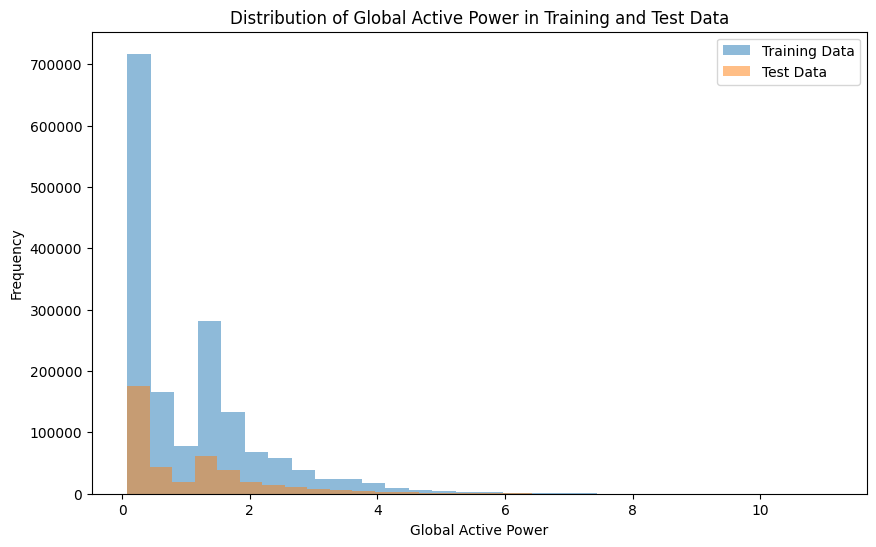

In [27]:
import matplotlib.pyplot as plt

# Example: Visualizing the distribution of 'Global_active_power' in training and test sets
plt.figure(figsize=(10, 6))

plt.hist(df_train['Global_active_power'], bins=30, alpha=0.5, label='Training Data')
plt.hist(df_test['Global_active_power'], bins=30, alpha=0.5, label='Test Data')

plt.xlabel('Global Active Power')
plt.ylabel('Frequency')
plt.title('Distribution of Global Active Power in Training and Test Data')
plt.legend()

plt.show()



**BUILDING MODELS**

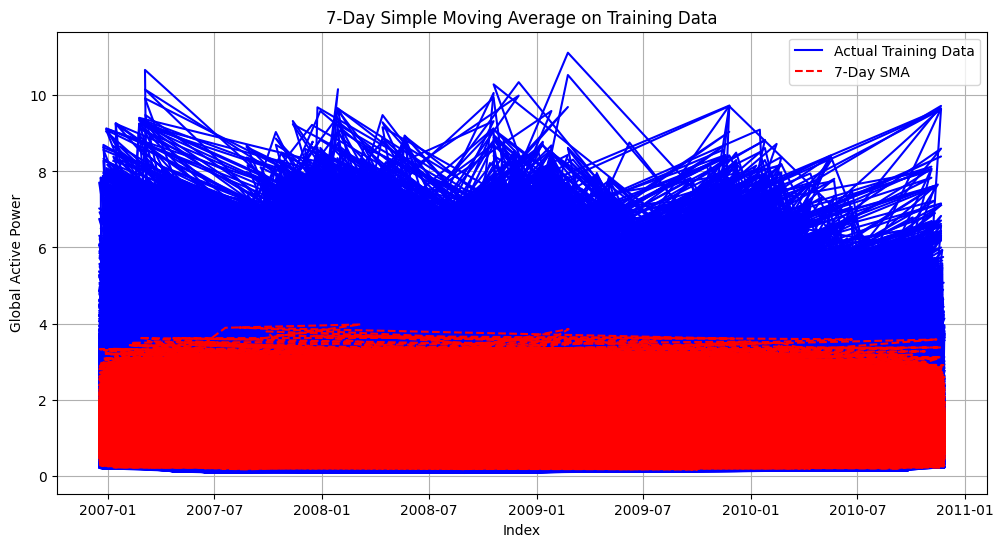

In [44]:
#Calculate Simple Moving Average (SMA)
import pandas as pd
import matplotlib.pyplot as plt


# Step 1: Calculate Simple Moving Average (SMA)
window_size = 7  # Example: Using a 7-day moving average
df_train['SMA'] = df_train['Global_active_power'].rolling(window=window_size).mean()

# Step 2: Visualize the Original Data and SMA
plt.figure(figsize=(12, 6))

# Increase the chunksize to handle the complex plot
plt.rcParams['agg.path.chunksize'] = 10000

plt.plot(df_train.index, df_train['Global_active_power'], label='Actual Training Data', color='blue')
plt.plot(df_train.index, df_train['SMA'], label=f'{window_size}-Day SMA', linestyle='--', color='red')
plt.xlabel('Index')
plt.ylabel('Global Active Power')
plt.title(f'{window_size}-Day Simple Moving Average on Training Data')
plt.legend()
plt.grid(True)
plt.show()




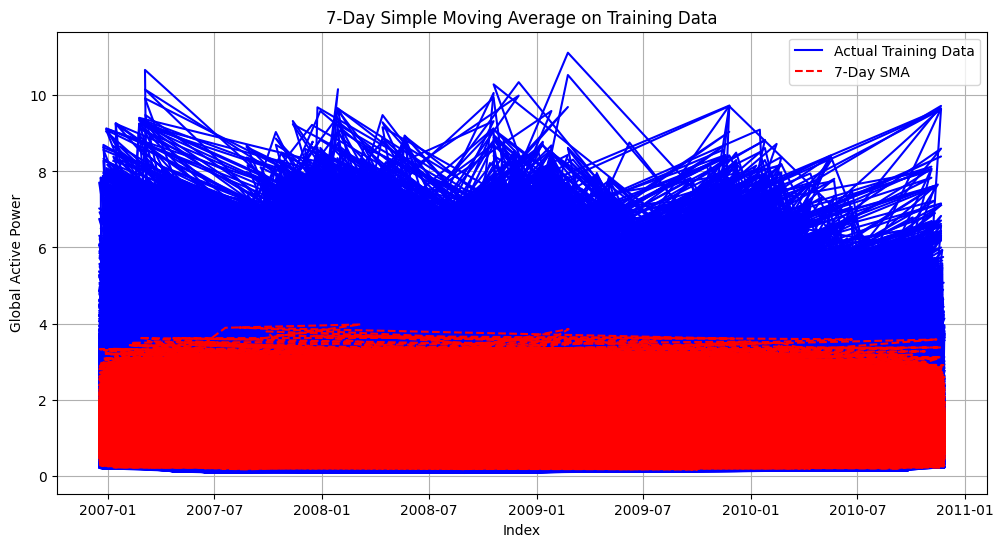

In [31]:
#Visualization of Simple Moving Average (SMA)

import matplotlib.pyplot as plt


# Step 1: Calculate Simple Moving Average (SMA)
window_size = 7  # Example: Using a 7-day moving average
df_train['SMA'] = df_train['Global_active_power'].rolling(window=window_size).mean()

# Step 2: Visualize the Original Data and SMA
plt.figure(figsize=(12, 6))
plt.plot(df_train.index, df_train['Global_active_power'], label='Actual Training Data', color='blue')
plt.plot(df_train.index, df_train['SMA'], label=f'{window_size}-Day SMA', linestyle='--', color='red')
plt.xlabel('Index')
plt.ylabel('Global Active Power')
plt.title(f'{window_size}-Day Simple Moving Average on Training Data')
plt.legend()
plt.grid(True)
plt.show()


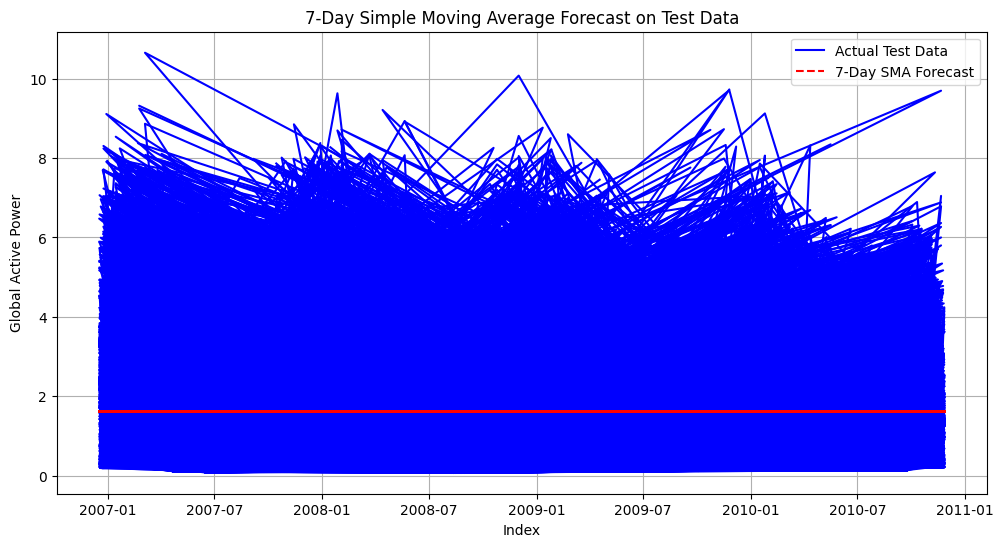

In [32]:
#Forecasting Using SMA on Test Data

# Step 3: Forecasting using SMA on Test Data
df_test['SMA_forecast'] = df_train['SMA'].iloc[-1]  # Forecast for test data starts with the last SMA value from training data

# Optionally, visualize SMA on test data
plt.figure(figsize=(12, 6))
plt.plot(df_test.index, df_test['Global_active_power'], label='Actual Test Data', color='blue')
plt.plot(df_test.index, df_test['SMA_forecast'], label=f'{window_size}-Day SMA Forecast', linestyle='--', color='red')
plt.xlabel('Index')
plt.ylabel('Global Active Power')
plt.title(f'{window_size}-Day Simple Moving Average Forecast on Test Data')
plt.legend()
plt.grid(True)
plt.show()


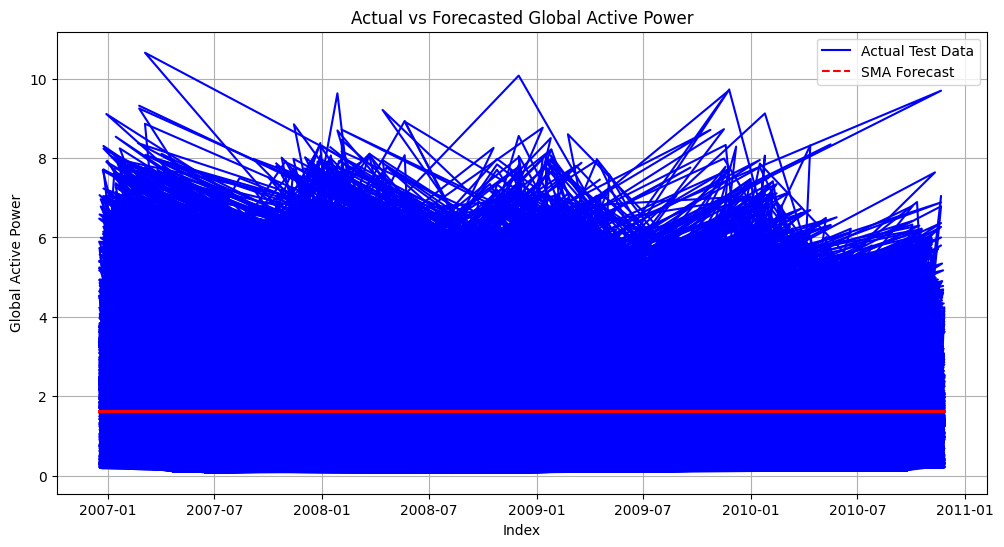

In [38]:
#Forecasting Using SMA Model
import matplotlib.pyplot as plt

# Plotting actual vs forecasted values
plt.figure(figsize=(12, 6))
plt.plot(df_test.index, df_test['Global_active_power'], label='Actual Test Data', color='blue')
plt.plot(df_test.index, df_test['SMA_forecast'], label='SMA Forecast', linestyle='--', color='red')
plt.xlabel('Index')
plt.ylabel('Global Active Power')
plt.title('Actual vs Forecasted Global Active Power')
plt.legend()
plt.grid(True)
plt.show()


In [45]:
# Define window size for SMA (e.g., 30 days)
window_size = 30

# Calculate SMA and store it in a new column 'SMA'
df['SMA'] = df['Global_active_power'].rolling(window=window_size).mean()

# Drop rows with NaN values in 'SMA' column (if any)
df.dropna(subset=['SMA'], inplace=True)

**Forecasting for 1 year**

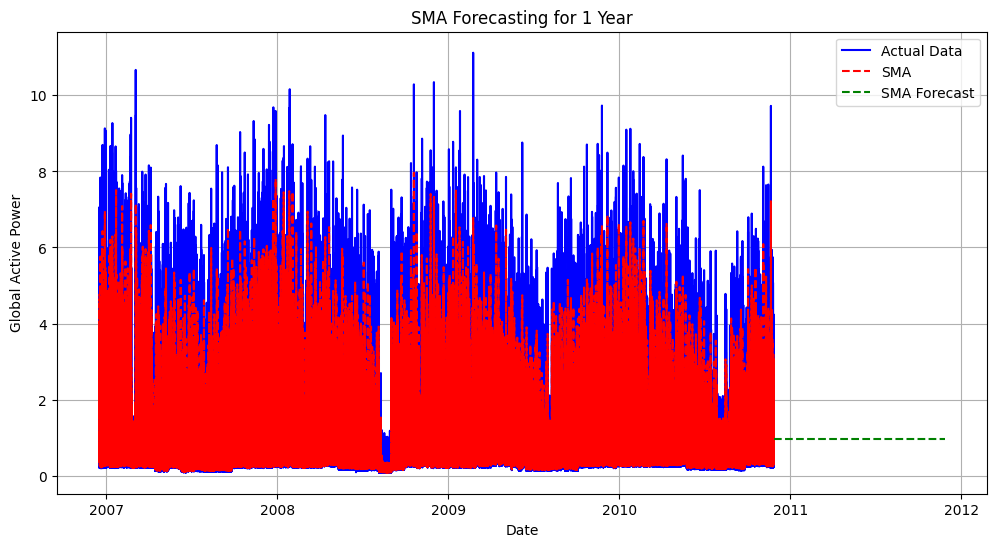

In [46]:
import matplotlib.pyplot as plt
import pandas as pd  # Import pandas for DateOffset

# Example: Extend index to include future dates for 1 year instead of 5 years
future_dates = pd.date_range(start=df.index[-1] + pd.DateOffset(1), periods=365, freq='D')

# Example: Create a DataFrame for forecasting
forecast = pd.DataFrame(index=future_dates, columns=['SMA_forecast'])

# Example: Assuming 'SMA' was calculated on 'df' and not 'df_train'
if 'SMA' in df.columns:
    # Initialize SMA forecast starting with the last available SMA value
    forecast['SMA_forecast'] = df['SMA'].iloc[-1]
else:
    print("Error: 'SMA' column not found in DataFrame 'df'. Calculate SMA first.")

# Example: Plotting historical data and SMA
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Global_active_power'], label='Actual Data', color='blue')

# Plot SMA only if it exists
if 'SMA' in df.columns:
    plt.plot(df.index, df['SMA'], label='SMA', linestyle='--', color='red')

plt.plot(forecast.index, forecast['SMA_forecast'], label='SMA Forecast', linestyle='--', color='green')
plt.xlabel('Date')
plt.ylabel('Global Active Power')
plt.title('SMA Forecasting for 1 Year')
plt.legend()
plt.grid(True)
plt.show()


**Forecasting for 5 Years**

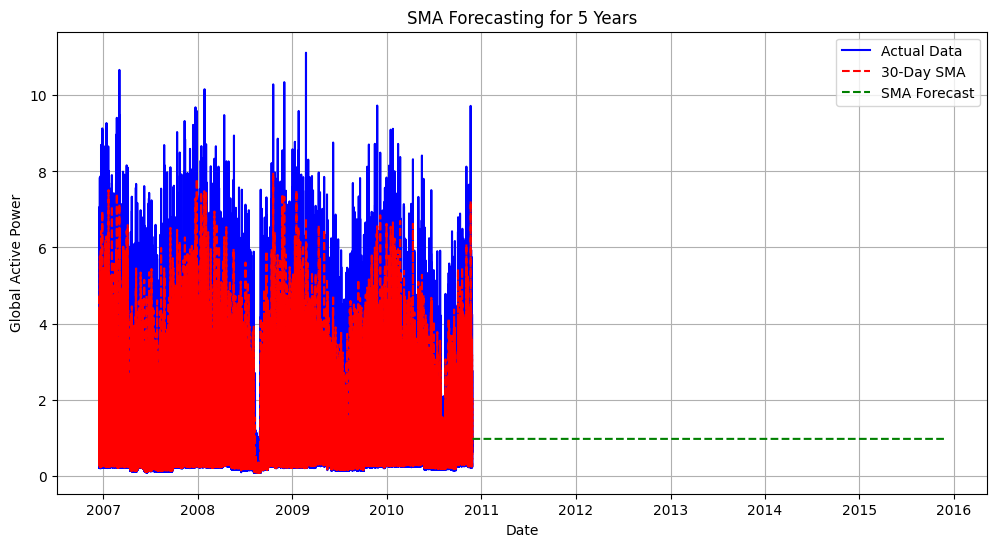

In [47]:
import matplotlib.pyplot as plt
import pandas as pd  # Import pandas for DateOffset

# Example: Extend index to include future dates for 5 years
future_dates = pd.date_range(start=df.index[-1] + pd.DateOffset(1), periods=5*365, freq='D')

# Example: Create a DataFrame for forecasting
forecast = pd.DataFrame(index=future_dates, columns=['SMA_forecast'])

# Example: Assuming 'SMA' was calculated on 'df' and not 'df_train'
if 'SMA' in df.columns:
    # Initialize SMA forecast starting with the last available SMA value
    forecast['SMA_forecast'] = df['SMA'].iloc[-1]
else:
    print("Error: 'SMA' column not found in DataFrame 'df'. Calculate SMA first.")

# Example: Plotting historical data and SMA
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Global_active_power'], label='Actual Data', color='blue')

# Plot SMA only if it exists
if 'SMA' in df.columns:
    plt.plot(df.index, df['SMA'], label=f'{window_size}-Day SMA', linestyle='--', color='red')

plt.plot(forecast.index, forecast['SMA_forecast'], label='SMA Forecast', linestyle='--', color='green')
plt.xlabel('Date')
plt.ylabel('Global Active Power')
plt.title(f'SMA Forecasting for 5 Years')
plt.legend()
plt.grid(True)
plt.show()



In [34]:
#Evaluation of the SMA Model


from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Handle NaN values before calculating metrics
df_test_cleaned = df_test.dropna(subset=['Global_active_power', 'SMA_forecast'])

# Calculate SMA forecast errors using the cleaned DataFrame
mae = mean_absolute_error(df_test_cleaned['Global_active_power'], df_test_cleaned['SMA_forecast'])
rmse = np.sqrt(mean_squared_error(df_test_cleaned['Global_active_power'], df_test_cleaned['SMA_forecast']))

print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')


Mean Absolute Error (MAE): 0.99
Root Mean Squared Error (RMSE): 1.18


**Interpretation of MAE and RMSE**

Mean Absolute Error (MAE):

MAE measures the average magnitude of the errors in a set of forecasts, without considering their direction (whether the forecast is overestimating or underestimating the actual value).MAE = 0.99 indicates that, on average, your SMA model's predictions are about 0.99 units away from the actual Global_active_power values.
Root Mean Squared Error (RMSE):

RMSE is a measure of the average magnitude of the error, where larger errors are penalized more heavily compared to MAE due to the squaring of the errors.
RMSE = 1.18 indicates the square root of the average of squared differences between predicted and actual Global_active_power values.

The SMA model achieved an MAE of 0.99 and RMSE of 1.18.These metrics indicate that our model generally predicts the Global Active Power within reasonable bounds.